In [2]:
import glob
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm # cm == confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle

matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
def plot_confusion_matrix(cm, title, target_names, cmap=plt.cm.cubehelix_r): # cmap is the type of the matrix you can show it to tutor by pressing tab
    plt.figure(figsize=(10,10)) # decaring x,y axis
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # image show function, interpolation maps the nearest values and cmap is our parameter
    plt.title(title) # setting the title
    plt.colorbar() # colorbar of the cmap accordingly what type we select it'll change accordingly
    tick_marks = np.arange(len(target_names)) # this will mark your labels according to the values
    plt.xticks(tick_marks, target_names, rotation=45) 
    plt.yticks(tick_marks, target_names) # this will plot y,x ticks the boxes that you can see wich activity is bieng done
    plt.tight_layout() # its a layout type... you can change his but there is no need
    plt.ylabel('Actual label') # as you can see at graph on y axis actual labels are written
    plt.xlabel('Predicted label') # predicted labels. see the figure that is formed.

In [4]:
#root = '~/Users/Sharoze/HMP_Dataset'
root = 'C:/Users/Junaid Tariq/ADL_Dataset/HMP_Dataset/'
data_class = {'Brush_teeth':0, 
              'Use_telephone':1, 
              'Drink_glass':2, 
              'Comb_hair':3, 
              'Walk':4,
              'Standup_chair':5,
              'Sitdown_chair':6,
              'Pour_water':7,
              'Getup_bed':8,
              'Liedown_bed':9,
              'Eat_meat':10,
              'Descend_stairs':11
             }

data_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
                '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928'] # defining the colors of the graph

data_labels = sorted(data_class, key=data_class.get, reverse=False)

In [5]:
def gather(class_dict):
    df = []
    for c in class_dict.keys():
        f = glob.glob(root + c + '/*')
        d = pd.DataFrame(reformat(f, cls=c))
        df.append(d)
    return pd.concat(df)

def reformat(files, cls):
    big_list = []
    for f in files:
        data = pd.read_table(f, sep=' ', header=None, names=['x', 'y', 'z'])
        features = pd.concat([data.mean(axis=0).rename(index=lambda x: 'mean' + '_' + x), 
                              data.std(axis=0).rename(index=lambda x: 'std' + '_' + x), 
                              data.max(axis=0).rename(index=lambda x: 'max' + '_' + x), 
                              data.min(axis=0).rename(index=lambda x: 'min' + '_' + x)]) # its calculating the mean, std, max and min values from the data.
        features['Y'] = data_class[cls]
        big_list.append(features)
    return big_list

In [6]:
data_df = gather(data_class)
data_Y = data_df.Y
data_X = data_df.iloc[:,:12] 

In [7]:
data_X, data_Y = shuffle(data_X, data_Y, random_state=0)
n_samples = 200

data_X_train = data_X[n_samples:]
data_Y_train = data_Y[n_samples:]
data_X_test = data_X[:n_samples]
data_Y_test = data_Y[:n_samples]

In [8]:
data_rf = RandomForestClassifier()
data_rf_model = data_rf.fit(data_X_train, data_Y_train)
data_rf_pred = data_rf_model.predict(data_X_test)
print(classification_report(data_Y_test, data_rf_pred, target_names=data_labels))

                precision    recall  f1-score   support

   Brush_teeth       1.00      1.00      1.00         3
 Use_telephone       1.00      0.25      0.40         4
   Drink_glass       0.75      0.92      0.83        26
     Comb_hair       1.00      1.00      1.00         4
          Walk       0.90      0.90      0.90        30
 Standup_chair       0.67      0.65      0.66        31
 Sitdown_chair       0.56      0.58      0.57        26
    Pour_water       0.79      0.79      0.79        29
     Getup_bed       0.77      0.75      0.76        32
   Liedown_bed       0.33      0.12      0.18         8
      Eat_meat       0.50      1.00      0.67         1
Descend_stairs       0.50      0.67      0.57         6

   avg / total       0.73      0.73      0.73       200



Brush_teeth 3
Use_telephone 1
Drink_glass 24
Comb_hair 4
Walk 27
Standup_chair 20
Sitdown_chair 15
Pour_water 23
Getup_bed 24
Liedown_bed 1
Eat_meat 1
Descend_stairs 4


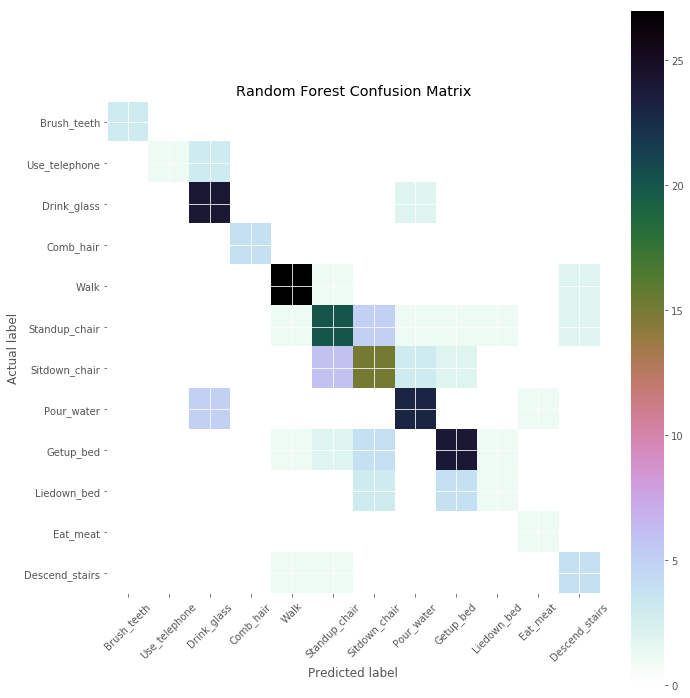

In [24]:
data_rf_cm = confusion_matrix(data_Y_test, data_rf_pred)
activities = data_rf_cm.diagonal()
for i in range(0,len(data_labels)):
    print(data_labels[i], activities[i])
plot_confusion_matrix(data_rf_cm, "Random Forest Confusion Matrix", data_labels)

In [25]:
data_knn = KNeighborsClassifier(n_neighbors=5)
data_knn_model = data_knn.fit(data_X_train, data_Y_train)
data_knn_pred = data_knn_model.predict(data_X_test)
print(classification_report(data_Y_test, data_knn_pred, target_names=data_labels))

                precision    recall  f1-score   support

   Brush_teeth       1.00      1.00      1.00         3
 Use_telephone       1.00      0.25      0.40         4
   Drink_glass       0.62      0.77      0.69        26
     Comb_hair       1.00      1.00      1.00         4
          Walk       0.86      0.80      0.83        30
 Standup_chair       0.58      0.84      0.68        31
 Sitdown_chair       0.65      0.50      0.57        26
    Pour_water       0.67      0.69      0.68        29
     Getup_bed       0.70      0.59      0.64        32
   Liedown_bed       0.00      0.00      0.00         8
      Eat_meat       1.00      1.00      1.00         1
Descend_stairs       0.33      0.50      0.40         6

   avg / total       0.66      0.67      0.65       200



C:\Users\Junaid Tariq\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


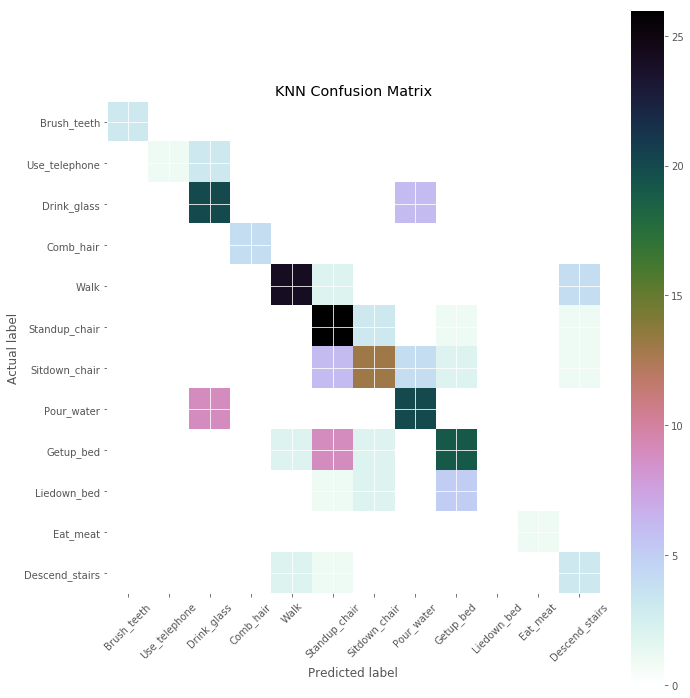

In [17]:
data_knn_cm = confusion_matrix(data_Y_test, data_knn_model.predict(data_X_test))
activities = data_knn_cm.diagonal()
for i in range(0,len(data_labels)):
    print(data_labels[i], activities[i])
plot_confusion_matrix(data_knn_cm, "KNN Confusion Matrix", data_labels)

[0.41196109 0.31283776 0.10599475 0.0526849  0.04132059 0.03189123
 0.0157673  0.01050432 0.00680962 0.00521244 0.00284694 0.00216909]


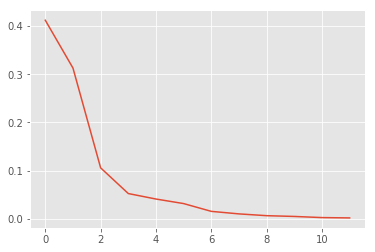

In [20]:
data_df = gather(data_class)
pca = PCA(n_components=12)
pca.fit(data_df.iloc[:,:12])
print(pca.explained_variance_ratio_)  

plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.show()